# Popular Python Packages

## 1. Pyodbc

pyodbc is an open source Python module that makes accessing ODBC databases simple. It implements the DB API 2.0 specification but is packed with even more Pythonic convenience.

Refer the link https://github.com/mkleehammer/pyodbc/wiki for detailed overview

### Install

Typically, pyodbc is installed like any other Python package by running:

In [ ]:
pip install pyodbc

from a Windows DOS prompt or Unix shell. See the pip documentation for more details about the pip utility.

As always when installing modules, you should consider using Python virtual environments.

### Step 1: Connect to a database

Pass an ODBC connection string to the pyodbc connect() function which will return a Connection. Once you have a connection you can ask it for a Cursor. For example:

In [ ]:
import pyodbc 
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'tcp:myserver.database.windows.net' 
database = 'mydb' 
username = 'myusername' 
password = 'mypassword' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

### Step 2: Execute query

The cursor.execute function can be used to retrieve a result set from a query against SQL Database. This function essentially accepts any query and returns a result set which can be iterated over with the use of cursor.fetchone()

In [ ]:
#Sample select query
cursor.execute("SELECT @@version;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

### Step 3: Insert a row

In this example you will see how to execute an INSERT statement safely, pass parameters which protect your application from SQL injection value.

In [ ]:
#Sample insert query
cursor.execute("INSERT SalesLT.Product (Name, ProductNumber, StandardCost, ListPrice, SellStartDate) OUTPUT INSERTED.ProductID VALUES ('SQL Server Express New 20', 'SQLEXPRESS New 20', 0, 0, CURRENT_TIMESTAMP )") 
cnxn.commit()
row = cursor.fetchone()

while row: 
    print 'Inserted Product key is ' + str(row[0]) 
    row = cursor.fetchone()

### Selecting Some Data
#### Select Basics
All SQL statements are executed using the Cursor execute() function. If the statement returns rows, such as a select statement, you can retrieve them using the Cursor fetch functions - fetchone(), fetchall(), fetchmany(). If there are no rows, fetchone() will return None, whereas fetchall() and fetchmany() will both return empty lists.

In [ ]:
cursor.execute("select user_id, user_name from users")
row = cursor.fetchone()
if row:
    print(row)

Row objects are similar to tuples, but they also allow access to columns by name:

In [ ]:
cursor.execute("select user_id, user_name from users")
row = cursor.fetchone()
print('name:', row[1])          # access by column index (zero-based)
print('name:', row.user_name)   # access by name

The fetchone() function returns None when all rows have been retrieved.

In [ ]:
while True:
    row = cursor.fetchone()
    if not row:
        break
    print('id:', row.user_id)

The fetchall() function returns all remaining rows in a list. Bear in mind those rows will all be stored in memory so if there a lot of rows, you may run out of memory. If there are no rows, an empty list is returned.

In [ ]:
cursor.execute("select user_id, user_name from users")
rows = cursor.fetchall()
for row in rows:
    print(row.user_id, row.user_name)

If you are going to process the rows one at a time, you can use the cursor itself as an iterator:

In [ ]:
cursor.execute("select user_id, user_name from users"):
for row in cursor:
    print(row.user_id, row.user_name)

or just:

In [ ]:
for row in cursor.execute("select user_id, user_name from users"):
    print(row.user_id, row.user_name)

### Parameters
ODBC supports parameters using a question mark as a place holder in the SQL. You provide the values for the question marks by passing them after the SQL:

In [ ]:
cursor.execute("""
    select user_id, user_name
      from users
     where last_logon < ?
       and bill_overdue = ?
""", datetime.date(2001, 1, 1), 'y')

This is safer than putting the values into the string because the parameters are passed to the database separately, protecting against SQL injection attacks. It is also be more efficient if you execute the same SQL repeatedly with different parameters. The SQL will be "prepared" only once. (pyodbc keeps only the last prepared statement, so if you switch between statements, each will be prepared multiple times.)

The Python DB API specifies that parameters should be passed as a sequence, so this is also supported by pyodbc:

In [ ]:
cursor.execute("""
    select user_id, user_name
      from users
     where last_logon < ?
       and bill_overdue = ?
""", [datetime.date(2001, 1, 1), 'y'])

## 2. Requests

The `requests` library is the _de facto_ standard for making HTTP requests in Python. It abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application.

__In this tutorial, you’ll learn how to:__

* Make requests using the most common HTTP methods
* Customize your requests’ headers and data, using the query string and message body
* Inspect data from your requests and responses
* Make authenticated requests
* Configure your requests to help prevent your application from backing up or slowing down

Though I’ve tried to include as much information as you need to understand the features and examples included in this article, I do assume a very basic general knowledge of HTTP. That said, you still may be able to follow along fine anyway.

### Getting Started With requests

Let’s begin by installing the requests library. To do so, run the following command:

In [ ]:
>>> pip install requests

Once requests is installed, you can use it in your application. Importing requests looks like this:

In [ ]:
import requests

### The GET Request

HTTP methods such as GET and POST, determine which action you’re trying to perform when making an HTTP request. Besides GET and POST, there are several other common methods that you’ll use later in this tutorial.

One of the most common HTTP methods is GET. The GET method indicates that you’re trying to get or retrieve data from a specified resource. To make a GET request, invoke requests.get().

To test this out, you can make a GET request to GitHub’s Root REST API by calling get() with the following URL:

In [ ]:
>>> requests.get('https://api.github.com')
<Response [200]>

#### The Response

A Response is a powerful object for inspecting the results of the request. Let’s make that same request again, but this time store the return value in a variable so that you can get a closer look at its attributes and behaviors:

In [ ]:
>>> response = requests.get('https://api.github.com')

#### Status Codes

The first bit of information that you can gather from Response is the status code. A status code informs you of the status of the request.

For example, a 200 OK status means that your request was successful, whereas a 404 NOT FOUND status means that the resource you were looking for was not found. There are many other possible status codes as well to give you specific insights into what happened with your request.

By accessing .status_code, you can see the status code that the server returned:

In [ ]:
>>> response.status_code
200

`.status_code` returned a 200, which means your request was successful and the server responded with the data you were requesting.

Let’s say you don’t want to check the response’s status code in an if statement. Instead, you want to raise an exception if the request was unsuccessful. You can do this using `.raise_for_status()`:

In [ ]:
import requests
from requests.exceptions import HTTPError

for url in ['https://api.github.com', 'https://api.github.com/invalid']:
    try:
        response = requests.get(url)

        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
    else:
        print('Success!')

If you invoke `.raise_for_status()`, an _HTTPError_ will be raised for certain status codes. If the status code indicates a successful request, the program will proceed without that exception being raised.

#### Content

The response of a GET request often has some valuable information, known as a payload, in the message body. Using the attributes and methods of Response, you can view the payload in a variety of different formats.

To see the response’s content in bytes, you use `.content`:

In [ ]:
>>> response = requests.get('https://api.github.com')
>>> response.content
b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","notifications_url":"https://api.github.com/notifications","organization_repositories_url":"https://api.github.com/orgs/{org}/repos{?type,page,per_page,sort}","organization_url":"https://api.github.com/orgs/{org}","public_gists_url":"https://api.github.com/gists/public","rate_limit_url":"https://api.github.com/rate_limit","repository_url":"https://api.github.com/repos/{owner}/{repo}","repository_search_url":"https://api.github.com/search/repositories?q={query}{&page,per_page,sort,order}","current_user_repositories_url":"https://api.github.com/user/repos{?type,page,per_page,sort}","starred_url":"https://api.github.com/user/starred{/owner}{/repo}","starred_gists_url":"https://api.github.com/gists/starred","team_url":"https://api.github.com/teams","user_url":"https://api.github.com/users/{user}","user_organizations_url":"https://api.github.com/user/orgs","user_repositories_url":"https://api.github.com/users/{user}/repos{?type,page,per_page,sort}","user_search_url":"https://api.github.com/search/users?q={query}{&page,per_page,sort,order}"}'

While `.content` gives you access to the raw bytes of the response payload, you will often want to convert them into a string using a character encoding such as UTF-8. response will do that for you when you access `.text`:

In [ ]:
>>> response.encoding = 'utf-8' # Optional: requests infers this internally
>>> response.text
'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","notifications_url":"https://api.github.com/notifications","organization_repositories_url":"https://api.github.com/orgs/{org}/repos{?type,page,per_page,sort}","organization_url":"https://api.github.com/orgs/{org}","public_gists_url":"https://api.github.com/gists/public","rate_limit_url":"https://api.github.com/rate_limit","repository_url":"https://api.github.com/repos/{owner}/{repo}","repository_search_url":"https://api.github.com/search/repositories?q={query}{&page,per_page,sort,order}","current_user_repositories_url":"https://api.github.com/user/repos{?type,page,per_page,sort}","starred_url":"https://api.github.com/user/starred{/owner}{/repo}","starred_gists_url":"https://api.github.com/gists/starred","team_url":"https://api.github.com/teams","user_url":"https://api.github.com/users/{user}","user_organizations_url":"https://api.github.com/user/orgs","user_repositories_url":"https://api.github.com/users/{user}/repos{?type,page,per_page,sort}","user_search_url":"https://api.github.com/search/users?q={query}{&page,per_page,sort,order}"}'

If you take a look at the response, you’ll see that it is actually serialized __JSON__ content. To get a dictionary, you could take the str you retrieved from `.text` and deserialize it using json.loads(). However, a simpler way to accomplish this task is to use `.json()`:

In [ ]:
>>> response.json()
{'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_url': 'https://api.github.com/issues', 'keys_url': 'https://api.github.com/user/keys', 'notifications_url': 'https://api.github.com/notifications', 'organization_repositories_url': 'https://api.github.com/orgs/{org}/repos{?type,page,per_page,sort}', 'organization_url': 'https://api.github.com/orgs/{org}', 'public_gists_url': 'https://api.github.com/gists/public', 'rate_limit_url': 'https://api.github.com/rate_limit', 'repository_url': 'https://api.github.com/repos/{owner}/{repo}', 'repository_search_url': 'https://api.github.com/search/repositories?q={query}{&page,per_page,sort,order}', 'current_user_repositories_url': 'https://api.github.com/user/repos{?type,page,per_page,sort}', 'starred_url': 'https://api.github.com/user/starred{/owner}{/repo}', 'starred_gists_url': 'https://api.github.com/gists/starred', 'team_url': 'https://api.github.com/teams', 'user_url': 'https://api.github.com/users/{user}', 'user_organizations_url': 'https://api.github.com/user/orgs', 'user_repositories_url': 'https://api.github.com/users/{user}/repos{?type,page,per_page,sort}', 'user_search_url': 'https://api.github.com/search/users?q={query}{&page,per_page,sort,order}'}

#### Headers

The response headers can give you useful information, such as the content type of the response payload and a time limit on how long to cache the response. To view these headers, access `.headers`:

In [ ]:
>>> response.headers
{'Server': 'GitHub.com', 'Date': 'Mon, 10 Dec 2018 17:49:54 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Status': '200 OK', 'X-RateLimit-Limit': '60', 'X-RateLimit-Remaining': '59', 'X-RateLimit-Reset': '1544467794', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept', 'ETag': 'W/"7dc470913f1fe9bb6c7355b50a0737bc"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security-Policy': "default-src 'none'", 'Content-Encoding': 'gzip', 'X-GitHub-Request-Id': 'E439:4581:CF2351:1CA3E06:5C0EA741'}

`.headers` returns a dictionary-like object, allowing you to access header values by key. For example, to see the content type of the response payload, you can access *Content-Type*:

In [ ]:
>>> response.headers['Content-Type']
'application/json; charset=utf-8'

### Other HTTP Methods

In [ ]:
>>> requests.post('https://httpbin.org/post', data={'key':'value'})
>>> requests.put('https://httpbin.org/put', data={'key':'value'})
>>> requests.delete('https://httpbin.org/delete')
>>> requests.head('https://httpbin.org/get')
>>> requests.patch('https://httpbin.org/patch', data={'key':'value'})
>>> requests.options('https://httpbin.org/get')

### Authentication

Authentication helps a service understand who you are. Typically, you provide your credentials to a server by passing data through the Authorization header or a custom header defined by the service. All the request functions you’ve seen to this point provide a parameter called auth, which allows you to pass your credentials.

One example of an API that requires authentication is GitHub’s Authenticated User API. This endpoint provides information about the authenticated user’s profile. To make a request to the Authenticated User API, you can pass your GitHub username and password in a tuple to get():

In [ ]:
>>> from getpass import getpass
>>> requests.get('https://api.github.com/user', auth=('username', getpass()))
<Response [200]>

In [ ]:
>>> from requests.auth import HTTPBasicAuth
>>> from getpass import getpass
>>> requests.get(
...     'https://api.github.com/user',
...     auth=HTTPBasicAuth('username', getpass())
... )
<Response [200]>

#### SSL Certificate Verification

Any time the data you are trying to send or receive is sensitive, security is important. The way that you communicate with secure sites over HTTP is by establishing an encrypted connection using SSL, which means that verifying the target server’s SSL Certificate is critical.

The good news is that requests does this for you by default. However, there are some cases where you might want to change this behavior.

If you want to disable SSL Certificate verification, you pass False to the verify parameter of the request function:

In [ ]:
>>> requests.get('https://api.github.com', verify=False)
InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
<Response [200]>

requests even warns you when you’re making an insecure request to help you keep your data safe!

## 2. Pandas

### Create Data 
We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.
### Get Data 
We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880.
### Prepare Data 
Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.
### Analyze Data 
We will simply find the most popular name in a specific year.
### Present Data 
Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.

The pandas library is used for all the data analysis excluding a small piece of the data presentation section. The matplotlib library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Pandas version 0.23.4
Matplotlib version 3.0.2


### Create Data
The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [3]:
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

To merge these two lists together we will use the zip function.

In [4]:
zip?

In [5]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

df will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [6]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Export the dataframe to a csv file. We can name the file births1880.csv. The function to_csv will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [7]:
df.to_csv?

The only parameters we will use is index and header. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [8]:
df.to_csv('births1880.csv',index=False,header=False)

### Get Data
To pull in the csv file, we will use the pandas function read_csv. Let us take a look at this function and what inputs it takes.

In [9]:
read_csv?


Even though this functions has many parameters, we will simply pass it the location of the text file.

Location = C:\Users\ENTER_USER_NAME.xy\startups\births1880.csv

Note: Depending on where you save your notebooks, you may need to modify the location above.

In [10]:
Location = r'C:\Users\Developer\Desktop\Python\Notebooks\births1880.csv'
df = pd.read_csv(Location)

Notice the r before the string. Since the slashes are special characters, prefixing the string with a r will escape the whole string.

In [12]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


This brings us to the first problem of the exercise. The read_csv function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

In [13]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


If we wanted to give the columns specific names, we would have to pass another parameter called names. We can also omit the header parameter.

In [14]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the csv file now that we are done using it.

In [15]:
import os
os.remove(Location)

### Prepare Data
The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).

The Names column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The Births column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [16]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [17]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

As you can see the Births column is of type int64, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

### Analyze Data
To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value

In [18]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [19]:
# Method 2:
df['Births'].max()


973

Present Data
Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Mel is the most popular baby name in the data set.

plot() is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.

Explain the pieces:
df['Names'] - This is the entire list of baby names, the entire Names column
df['Births'] - This is the entire list of Births in the year 1880, the entire Births column
df['Births'].max() - This is the maximum value found in the Births column

[df['Births'] == df['Births'].max()] IS EQUAL TO [Find all of the records in the Births column where it is equal to 973]
df['Names'][df['Births'] == df['Births'].max()] IS EQUAL TO Select all of the records in the Names column WHERE [The Births column is equal to 973]

An alternative way could have been to use the Sorted dataframe:
Sorted['Names'].head(1).value

The str() function simply converts an object into a string.

The most popular name


,Names,Births
4,Mel,973


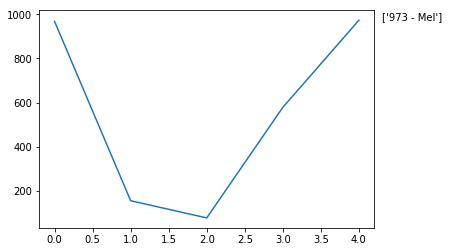

In [21]:

# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

## 3. Matplotlib 

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

Easy to get started
Support for LATEX formatted labels and texts
Great control of every element in a figure, including figure size and DPI.
High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
GUI for interactively exploring figures and support for headless generation of figure files (useful for batch jobs).
One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled programmatically. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance.

More information at the Matplotlib web page: http://matplotlib.org/

To get started using Matplotlib in a Python program, either include the symbols from the pylab module (the easy way):

In [23]:
from pylab import *

or import the matplotlib.pyplot module under the name plt (the tidy way):

In [24]:
import matplotlib
import matplotlib.pyplot as plt

In [25]:
import numpy as np

### MATLAB-like API
The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib.

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

To use this API from matplotlib, we need to include the symbols in the pylab module:

In [26]:
from pylab import *

### Example
A simple figure with MATLAB-like plotting API:

In [27]:
x = np.linspace(0, 5, 10)
y = x ** 2

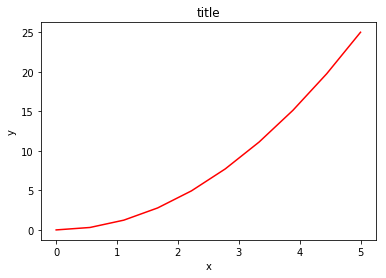

In [28]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

Most of the plotting related functions in MATLAB are covered by the pylab module. For example, subplot and color/symbol selection:

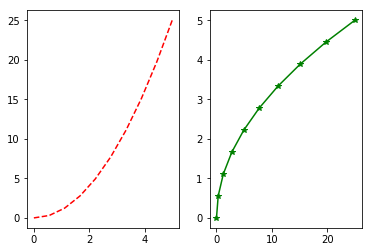

In [29]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots.

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.

Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with.

### The matplotlib object-oriented API
The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot.

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the fig variable, and from it we create a new axis instance axes using the add_axes method in the Figure class instance fig:

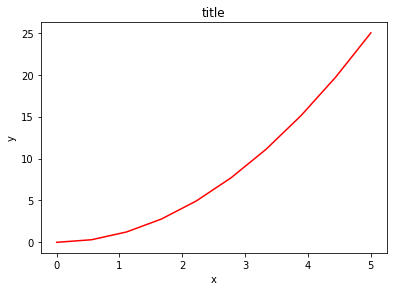

In [30]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

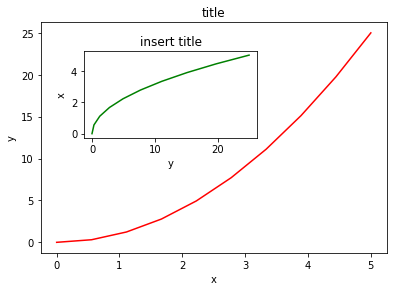

In [31]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is subplots, which can be used like this:

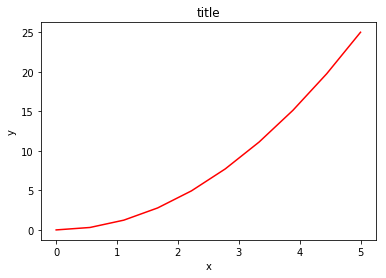

In [32]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

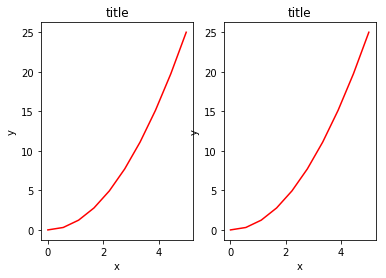

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the fig.tight_layout method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

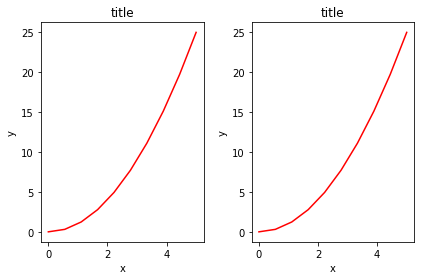

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Figure size, aspect ratio and DPI
Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created, using the figsize and dpi keyword arguments. figsize is a tuple of the width and height of the figure in inches, and dpi is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:

In [35]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the subplots function:

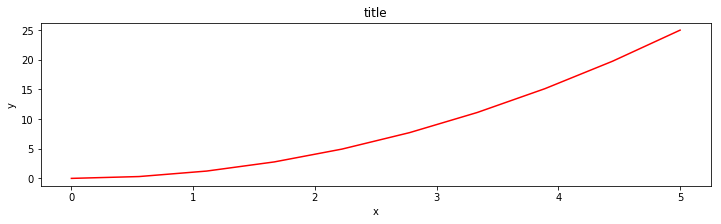

In [36]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Saving figures
To save a figure to a file we can use the savefig method in the Figure class:

In [37]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [38]:
fig.savefig("filename.png", dpi=200)

### What formats are available and which ones should be used for best quality?
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with pdflatex can include PDFs using the includegraphics command). In some cases, PGF can also be good alternative.

#### Legends, labels and titles
Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

##### Figure titles

A title can be added to each axis instance in a figure. To set the title, use the set_title method in the axes instance:

In [39]:
ax.set_title("title");

##### Axis labels

Similarly, with the methods set_xlabel and set_ylabel, we can set the labels of the X and Y axes:

In [40]:
ax.set_xlabel("x")
ax.set_ylabel("y");

##### Legends

Legends for curves in a figure can be added in two ways. One method is to use the legend method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [41]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

In [42]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The legend function takes an optional keyword argument loc that can be used to specify where in the figure the legend is to be drawn. The allowed values of loc are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common loc values are:

In [43]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

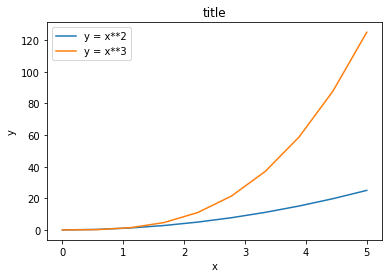

In [44]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [45]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

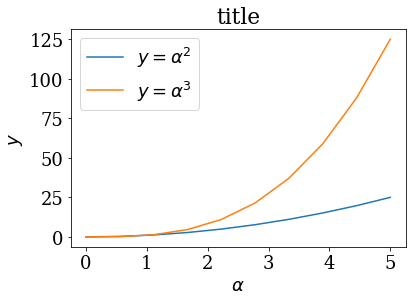

In [46]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### Setting colors, linewidths, linetypes
#### Colors
With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where 'b' means blue, 'g' means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [47]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments:

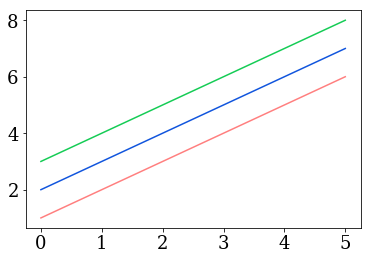

In [48]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Line and marker styles
To change the line width, we can use the linewidth or lw keyword argument. The line style can be selected using the linestyle or ls keyword arguments:

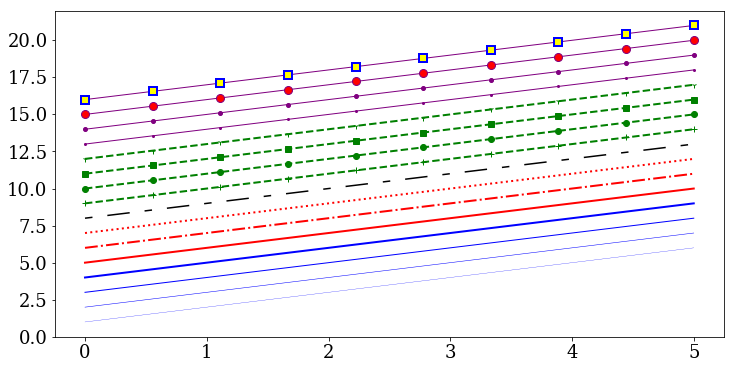

In [49]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Placement of ticks and custom tick labels
We can explicitly determine where we want the axis ticks with set_xticks and set_yticks, which both take a list of values for where on the axis the ticks are to be placed. We can also use the set_xticklabels and set_yticklabels methods to provide a list of custom text labels for each tick location:

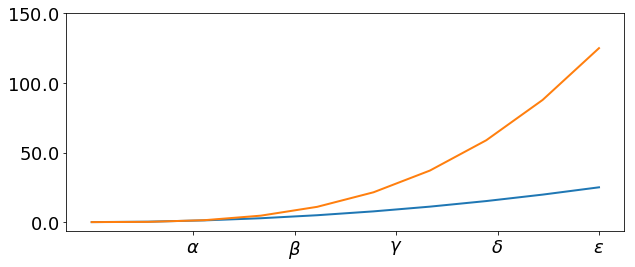

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

## 4.Numpy

1 - What is NumPy?

NumPy is the basis of Pandas and many other packages. What makes NumPy such an incredible package is its data type (ndarray). ndarray stands for n-dimensional array, which basically looks like a Python list. However, it is a lot faster than a regular Python list. A Python list can contain different kinds of data types such as integers, strings, Boolean, True, False and even lists. On the other hand, NumPy arrays can hold only one type of data, and therefore doesn’t have to check the type of data type for every single element of the array when it is doing the computations. This feature makes NumPy a great tool for data science research and projects.
Before we get started, let’s check the version of NumPy and Python.

In [1]:
#import NumPy
import numpy as np
# sys was imported to check the python version
import sys
# check the version of python and NumPy
print('NumPy version:', np.__version__)
print('Python version',sys.version)

NumPy version: 1.15.4
Python version 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


2- How to create NumPy arrays
There are many ways to create arrays in NumPy. Let’s take a look at a few of them here.

In [3]:
# Create one dimensional NumPy array
np.array([1, 2, 3])

array([1, 2, 3])

In [4]:
# Array of zeros
np.zeros(3)

array([0., 0., 0.])

In [5]:
# Array of 1s
np.ones(3)

array([1., 1., 1.])

In [6]:
# Array of 3 random integers between 1 and 10
np.random.randint(1,10, 3)

array([2, 3, 6])

In [7]:
# Create linearly spaced array
np.linspace(0, 10, 5 )

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [8]:
# Create 2-dimensional array
np.array([[1,2,3],
          [4,5,6],
          [7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
# Create 3x4 array values between 0 and 1
np.random.random((3,4))

array([[6.47210970e-01, 7.29533227e-01, 9.74550067e-01, 4.59694726e-01],
       [9.58289535e-01, 5.31945526e-01, 1.56408802e-01, 6.54095787e-04],
       [1.23897148e-01, 4.79131817e-01, 9.15787046e-01, 6.26860225e-01]])

Let’s create 1-Dimensional and 2-Dimensional arrays.

In [10]:
a = np.array([1,2,3])
b = np.random.randint(0,10, (3,3))
print(a)
print(b)

[1 2 3]
[[1 7 3]
 [4 6 1]
 [6 4 8]]


In [11]:
# Adding new values into the the array
a = np.append(a, 4)
a

array([1, 2, 3, 4])

In [12]:
# Print the shape and dimension of arrays
print("Shape of a:", np.shape(a))
print("Shape of b:", np.shape(b))
print('Dimension of a:', np.ndim(a))
print('Dimension of b:', np.ndim(b))

Shape of a: (4,)
Shape of b: (3, 3)
Dimension of a: 1
Dimension of b: 2


In [13]:
# Number of elements in the arrays
print('Number of elements in a:', np.size(a))
print('Number of elements in b:', np.size(b))

Number of elements in a: 4
Number of elements in b: 9


3- Indexing and Fancy Indexing
Indexing allows us to access the elements in the list. Indexing is the simplest way to do that. However, there are other ways, too such as fancy indexing, slicing and masking.

In [14]:
# a is 1D array, we created before
a

array([1, 2, 3, 4])

In [15]:
# b is 2D array, we created before
b

array([[1, 7, 3],
       [4, 6, 1],
       [6, 4, 8]])

In [16]:
# Get the first element of a 
# These two print statements generate the same result
print(a[0])
print(a[-4])

1
1


In [17]:
# Get the last element of a 
# These two print statements generate the same result
print(a[-1]) 
print(a[3])

4
4


In [18]:
# Get the first row of b
# These two print statements generate the same result
print(b[0]) 
print(b[0,:])

[1 7 3]
[1 7 3]


In [19]:
# Get the second column of b
b[:,1]

array([7, 6, 4])

Fancy indexing allows us to pick certain values in the list quickly.

In [21]:
# To understand the fancy indexing better we will create two new arrays. 
x = np.array(['a', 'b', 'c'])
y = np.array([['d', 'e', 'f'], 
              ['g', 'h', 'k']])
print(x)
print(y)

['a' 'b' 'c']
[['d' 'e' 'f']
 ['g' 'h' 'k']]


In [22]:
# Fancy indexing on 1-D array
# Get the value of c in array x
ind = [2]
x[ind]

array(['c'], dtype='<U1')

In [23]:
# Fancy indexing on 2D array
# Get the values e, h in array y
ind2 = [[0,1],[1]]
y[ind2]

C:\Users\Developer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


array(['e', 'h'], dtype='<U1')

4- Slicing
Slicing is the way to choose a range of values in the array. We use a colon (:) in square brackets.
This is the structure of slicing in NumPy. [Start : Stop : Step]

In [24]:
# Create an array of integers from 1 to 10
X = np.arange(1, 11, dtype=int)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
# Get the first two elements of X 
X[:2]

array([1, 2])

In [26]:
# Get the number 3,4 and 5 
X[2:5]

array([3, 4, 5])

In [27]:
# Get odd numbers 
X[::2]

array([1, 3, 5, 7, 9])

In [28]:
# Get even numbers
X[1::2]

array([ 2,  4,  6,  8, 10])

In [29]:
# Create 2-D array 
Y= np.arange(1,10).reshape(3,3)
Y

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
# Get the first and second row
Y[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
# Get the second and third column
Y[:, 1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [32]:
# Get the element of 5 and 6
Y[1,1:]

array([5, 6])

5- Universal Functions (Ufuncs)
Universal functions are useful when it comes to doing statistical and mathematical operations in NumPy arrays. NumPy Ufuncs are significantly faster than Python because the same operation in Python might require loops.
To see the list of available Ufuncs press tab after np. For example: np.{TAB}

In [33]:
# Find the maximum element of X
np.max(X)

10

In [34]:
# Mean of values in the X
np.mean(X)

5.5

In [35]:
# Get the 4th power of each element in X
np.power(X, 4)

array([    1,    16,    81,   256,   625,  1296,  2401,  4096,  6561,
       10000], dtype=int32)

In [36]:
# Trigonometric functions 
print(np.sin(X))
print(np.tan(X))

[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825  0.41211849 -0.54402111]
[ 1.55740772 -2.18503986 -0.14254654  1.15782128 -3.38051501 -0.29100619
  0.87144798 -6.79971146 -0.45231566  0.64836083]


In [37]:
    # (sinx)2 + (cosy)2 = 1 famous trigonometric equation
np.square(np.sin(X)) + np.square(np.cos(X))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
# array Y created before
Y

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [39]:
# The same rules apply for 2-D arrays
np.multiply(Y, 2)

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [40]:
# split Y into 3 subarrays
np.split(Y, 3)

[array([[1, 2, 3]]), array([[4, 5, 6]]), array([[7, 8, 9]])]

6- Broadcasting
Broadcasting makes it possible to use Ufuncs and many other operations on different sizes of arrays. There are some rules in order to do broadcasting. I won’t go into details here. However, I will refer a tutorial below.

In [41]:
# Add 5 to each element of X
X + 5

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
# Or 
np.add(X, 5)

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [43]:
# Create new array Z 
Z = np.arange(3)[:, np.newaxis]
Z

array([[0],
       [1],
       [2]])

In [44]:
# Multiple Y and Z
np.multiply(Y, Z)

array([[ 0,  0,  0],
       [ 4,  5,  6],
       [14, 16, 18]])

7- Masking, Comparing and Sorting
Masking is another very useful method of NumPy arrays.

In [45]:
# Create an array of 10 elements between 1 and 5
x = np.random.randint(1,5, 10)
x

array([2, 3, 3, 1, 1, 3, 2, 2, 3, 1])

In [46]:
# Create (3,3) size of array elements from 1 and 5
y = np.random.randint(1,5, (3,3))
y

array([[3, 4, 1],
       [4, 3, 4],
       [4, 3, 2]])

In [47]:
# Sort elements in array x
np.sort(x)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

In [48]:
# Sort values along the rows
np.sort(y, axis=0)

array([[3, 3, 1],
       [4, 3, 2],
       [4, 4, 4]])

In [49]:
# Sort values along the columns
np.sort(y, axis=1)

array([[1, 3, 4],
       [3, 4, 4],
       [2, 3, 4]])

In [50]:
# == , !=, < , >, >=, <= operations on arrays
# This returns a Boolean
x > 3

array([False, False, False, False, False, False, False, False, False,
       False])

In [53]:
# Use masking feature to get the values of comparisons
x[x>3]

array([], dtype=int32)

In [52]:
# Another example 
x[(x <= 3) & ( x > 1 )]

array([2, 3, 3, 3, 2, 2, 3])